<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Image%20Classification%20with%20Flower%20Photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Image Calssification***
This post is **based on the Tensorflow tutorial** for study purposes. [Link](https://www.tensorflow.org/tutorials/keras/classification)   
If you get a chance, be sure to try the this tutorial.

Now let's **Image Calssification** review, we go through six steps.
- Download and Get the flowers dataset.
- Standardize the data.
- Build and train the model.
- Avoid the over-fitting
- Increase performance with data augmentation.
- Visualize training results and predict on new data.

In [ ]:
import os
import PIL
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(
    'flower_photos', origin=url, untar=True
)
data_dir = pathlib.Path(data_dir)

print("Data path:", data_dir)

print("Sub directory:", 
    list(data_dir.iterdir())      
)

228827136/228813984 [==============================] - 6s 0us/step
Data path: /root/.keras/datasets/flower_photos
Sub directory: [PosixPath('/root/.keras/datasets/flower_photos/sunflowers'), PosixPath('/root/.keras/datasets/flower_photos/daisy'), PosixPath('/root/.keras/datasets/flower_photos/tulips'), PosixPath('/root/.keras/datasets/flower_photos/dandelion'), PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'), PosixPath('/root/.keras/datasets/flower_photos/roses')]


Image count: 3670


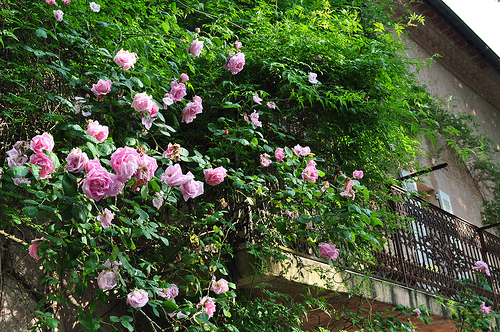

In [ ]:
image_count = len(
    list(data_dir.glob("*/*.jpg"))
)
print("Image count:", image_count)

roses = list(
    data_dir.glob("roses/*")
)
PIL.Image.open(str(roses[0]))

In [ ]:
seed = 47
batch_size = 32
image_height = 180
image_width = 100

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
     validation_split=0.2, 
     subset='training', seed=seed,
      image_size=(image_height, image_width),
       batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, 
    subset='validation', seed=seed,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_name = train_dataset.class_names
print(">>> class_name = ", class_name)

>>> class_name =  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(seed).prefetch(buffer_size=AUTOTUNE)

val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_dataset = train_dataset.map(
    lambda x, y: (normalization_layer(x), y)
)
image_batch, labels_batch = next(iter(normalized_dataset))

first_image = image_batch[0]
print(">>> min = {} max = {}".format(
    np.min(first_image), np.max(first_image))
)

>>> min = 0.000882317079231143 max = 1.0


In [ ]:
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 12, 64)        0

In [ ]:
epochs=10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 42s 58ms/step - loss: 1.3294 - accuracy: 0.4326 - val_loss: 1.1380 - val_accuracy: 0.5191
Epoch 2/10
92/92 [==============================] - 2s 25ms/step - loss: 0.9987 - accuracy: 0.6097 - val_loss: 1.0525 - val_accuracy: 0.5995
Epoch 3/10
92/92 [==============================] - 2s 24ms/step - loss: 0.8565 - accuracy: 0.6669 - val_loss: 1.0290 - val_accuracy: 0.6117
Epoch 4/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7074 - accuracy: 0.7299 - val_loss: 1.0293 - val_accuracy: 0.6158
Epoch 5/10
92/92 [==============================] - 2s 25ms/step - loss: 0.5400 - accuracy: 0.8025 - val_loss: 1.0178 - val_accuracy: 0.6281
Epoch 6/10
92/92 [==============================] - 2s 25ms/step - loss: 0.3466 - accuracy: 0.8757 - val_loss: 1.2514 - val_accuracy: 0.6267
Epoch 7/10
92/92 [==============================] - 2s 25ms/step - loss: 0.2191 - accuracy: 0.9271 - val_loss: 1.5147 - val_accuracy: 0.6049
Epoch 8/10
9

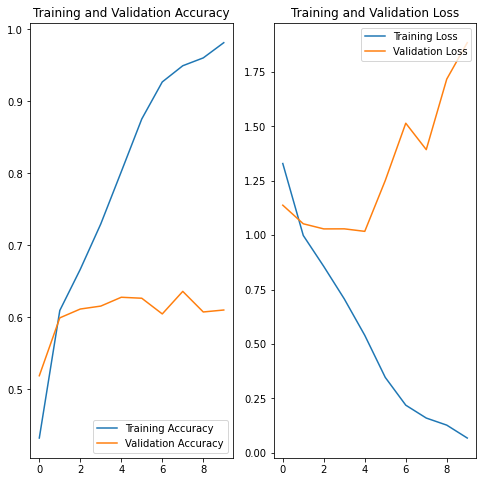

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(
        'horizontal', input_shape=(image_height, image_width, 3)
    ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

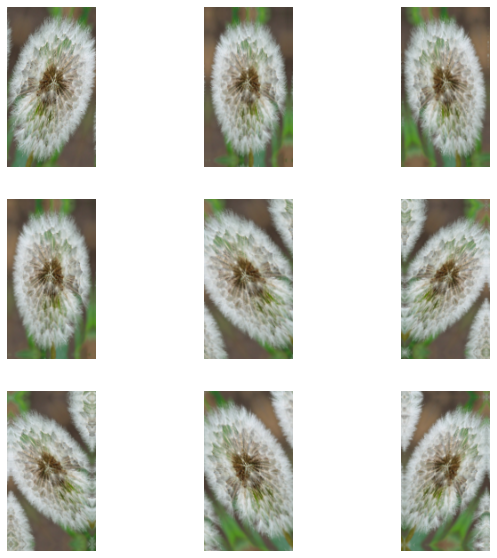

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
    augmentation,

    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 100, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 25, 64)       

In [ ]:
epochs = 15

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 4s 34ms/step - loss: 1.2626 - accuracy: 0.4581 - val_loss: 1.3727 - val_accuracy: 0.4401
Epoch 2/15
92/92 [==============================] - 4s 39ms/step - loss: 1.0126 - accuracy: 0.5995 - val_loss: 1.0616 - val_accuracy: 0.5599
Epoch 3/15
92/92 [==============================] - 3s 33ms/step - loss: 0.9119 - accuracy: 0.6505 - val_loss: 1.1029 - val_accuracy: 0.5995
Epoch 4/15
92/92 [==============================] - 3s 30ms/step - loss: 0.8488 - accuracy: 0.6740 - val_loss: 0.9940 - val_accuracy: 0.6281
Epoch 5/15
92/92 [==============================] - 3s 30ms/step - loss: 0.8038 - accuracy: 0.6843 - val_loss: 0.9016 - val_accuracy: 0.6335
Epoch 6/15
92/92 [==============================] - 3s 31ms/step - loss: 0.7529 - accuracy: 0.7084 - val_loss: 0.8632 - val_accuracy: 0.6812
Epoch 7/15
92/92 [==============================] - 3s 30ms/step - loss: 0.7310 - accuracy: 0.7255 - val_loss: 0.8559 - val_accuracy: 0.6703
Epoch 8/15
92

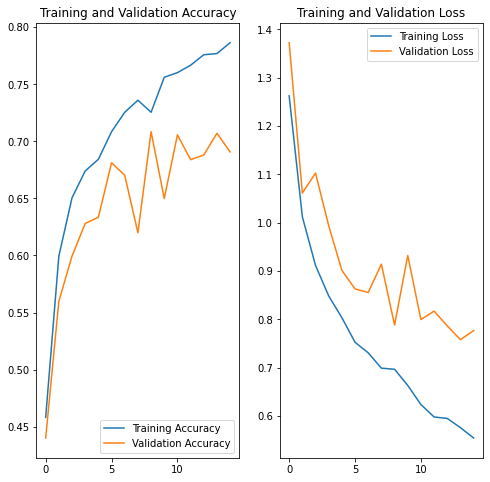

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

image = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(image_height, image_width)
)
image_array = keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

print(
    "{} percent confidence = {}."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

sunflowers percent confidence = 92.3213541507721.
